In [1]:
import pandas as pd

In [4]:
stock_data = pd.read_csv('Netflix_Dataset.csv', index_col='Date')

In [5]:
stock_data.head()

,Open,High,Low,Close,Volume
Date,,,,,
04-03-2019,359.72,362.25,348.04,351.04,"74,86,996"
05-03-2019,351.46,356.17,348.25,354.30,"59,37,754"
06-03-2019,353.60,359.88,351.70,359.61,"62,11,895"
07-03-2019,360.16,362.86,350.50,352.60,"61,51,331"
08-03-2019,345.75,349.92,342.47,349.60,"68,98,838"


### Plotting the High and Low points of Netflix stock over 3 years

In [6]:
import matplotlib.pyplot as plt

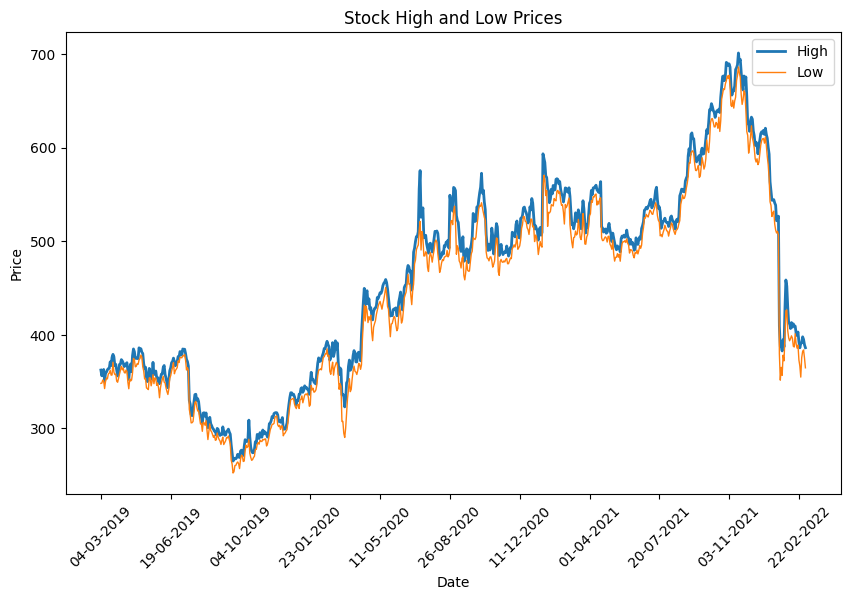

In [7]:
# Assuming 'stock_data' has a 'Date' column or is using Date as the index

plt.figure(figsize=(10, 6))

plt.plot(stock_data['High'], label='High', linewidth=2)

plt.plot(stock_data['Low'], label='Low', linewidth=1)

# Adding labels and title

plt.title('Stock High and Low Prices')

plt.xlabel('Date')

plt.ylabel('Price')

plt.legend()

# Rotating the x-axis labels to avoid overlap

plt.xticks(rotation=45)

# Optionally, limit the number of x-ticks for better readability

plt.xticks(stock_data.index[::len(stock_data)//10])  

# Show the plot

plt.show()

### Plotting the Open and Close value of the stock for each day

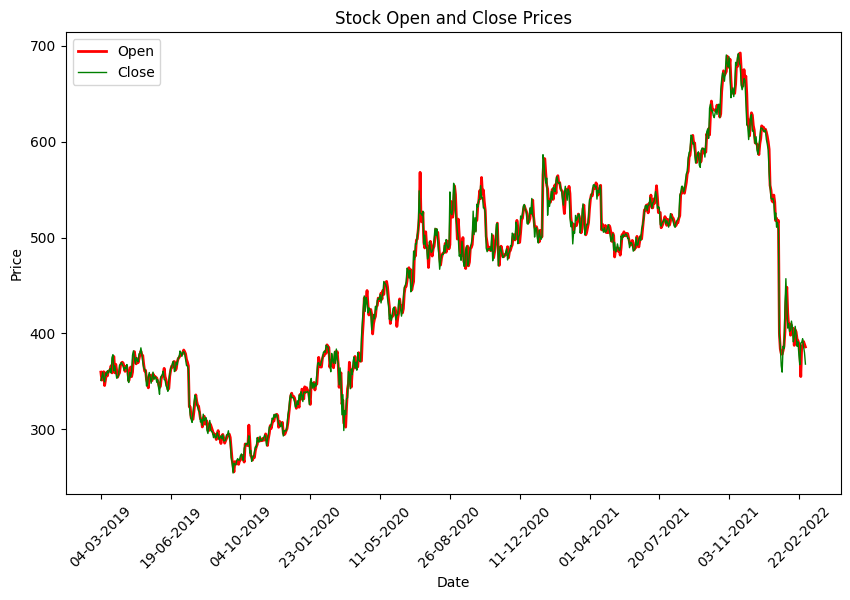

In [8]:
plt.figure(figsize=(10, 6))

plt.plot(stock_data['Open'], label='Open', color='red', linewidth=2)

plt.plot(stock_data['Close'], label='Close', color='green', linewidth=1)

# Adding labels and title

plt.title('Stock Open and Close Prices')

plt.xlabel('Date')

plt.ylabel('Price')

plt.legend()

# Rotating the x-axis labels to avoid overlap

plt.xticks(rotation=45)

# Optionally, limit the number of x-ticks for better readability

plt.xticks(stock_data.index[::len(stock_data)//10])  # Adjust the step size based on your data size

# Show the plot

plt.show()

In [9]:
import matplotlib.pyplot as plt

import pandas as pd

import numpy as np

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import LSTM

from tensorflow.keras.layers import Dropout

from tensorflow.keras.layers import *

from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_percentage_error

from sklearn.model_selection import train_test_split

from sklearn.model_selection import TimeSeriesSplit

import matplotlib.pyplot as plt

2026-01-10 21:39:10.485858: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Data Preprocessing

In [10]:
#Data Preprocessing

target_y = stock_data['Close']

X_feat = stock_data.iloc[:,0:3]

stock_data = stock_data[['Open', 'High', 'Low', 'Close']]

In [11]:
#Feature Scaling

sc = StandardScaler()

stock_data_ft = sc.fit_transform(stock_data.values)

stock_data_ft = pd.DataFrame(columns=stock_data.columns,

                            data=stock_data_ft,

                            index=stock_data.index)

In [12]:
def lstm_split(data, n_steps):

    X, y = [], []

    for i in range(len(data) - n_steps):

        # Extract a window of size `n_steps` for features

        X.append(data[i:i + n_steps, :-1])  # All but last column

        # Extract the `n_steps`-th target value

        y.append(data[i + n_steps - 1, -1])  # Target value (last column)

    return np.array(X), np.array(y)

### Train and Test Sets

In [13]:
X1, y1 = lstm_split(stock_data_ft.values, n_steps=1)

train_split=0.8

split_idx= int(np.ceil(len(X1)*train_split))

date_index = stock_data_ft.index

X_train, X_test = X1[:split_idx], X1[split_idx:]

y_train, y_test = y1[:split_idx], y1[split_idx:]

X_train_date, X_test_date = date_index[:split_idx], date_index[split_idx:]

print(X1. shape, X_train. shape, X_test.shape, y_test.shape)

(757, 1, 3) (606, 1, 3) (151, 1, 3) (151,)


### Building the LSTM model

In [14]:
# Define LSTM Model

lstm = Sequential()

# LSTM Layer (Set return_sequences=False for one output per sample)

lstm.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu', return_sequences=True))

# Output Layer

lstm.add(Dense(1))

# Compile the Model

lstm.compile(loss='mean_squared_error', optimizer='adam')

# Print Model Summary

lstm.summary()

/Users/cdmstudent/tensorflow-env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 32)          │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1, 1)           │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,641 (18.13 KB)

 Trainable params: 4,641 (18.13 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Fit this simple model to the training data.

history = lstm.fit(X_train, y_train, epochs=100, batch_size=4, validation_split=0.2, verbose=2, shuffle=False)

Epoch 1/100
121/121 - 2s - 17ms/step - loss: 0.5294 - val_loss: 0.3089
Epoch 2/100
121/121 - 0s - 3ms/step - loss: 0.0949 - val_loss: 0.0584
Epoch 3/100
121/121 - 0s - 3ms/step - loss: 0.0134 - val_loss: 0.0092
Epoch 4/100
121/121 - 0s - 2ms/step - loss: 0.0130 - val_loss: 0.0090
Epoch 5/100
121/121 - 0s - 4ms/step - loss: 0.0128 - val_loss: 0.0090
Epoch 6/100
121/121 - 0s - 3ms/step - loss: 0.0127 - val_loss: 0.0090
Epoch 7/100
121/121 - 0s - 3ms/step - loss: 0.0126 - val_loss: 0.0091
Epoch 8/100
121/121 - 0s - 3ms/step - loss: 0.0125 - val_loss: 0.0092
Epoch 9/100
121/121 - 0s - 3ms/step - loss: 0.0124 - val_loss: 0.0092
Epoch 10/100
121/121 - 0s - 3ms/step - loss: 0.0124 - val_loss: 0.0093
Epoch 11/100
121/121 - 0s - 3ms/step - loss: 0.0123 - val_loss: 0.0093
Epoch 12/100
121/121 - 0s - 3ms/step - loss: 0.0123 - val_loss: 0.0093
Epoch 13/100
121/121 - 0s - 3ms/step - loss: 0.0123 - val_loss: 0.0093
Epoch 14/100
121/121 - 0s - 3ms/step - loss: 0.0122 - val_loss: 0.0093
Epoch 15/100
1

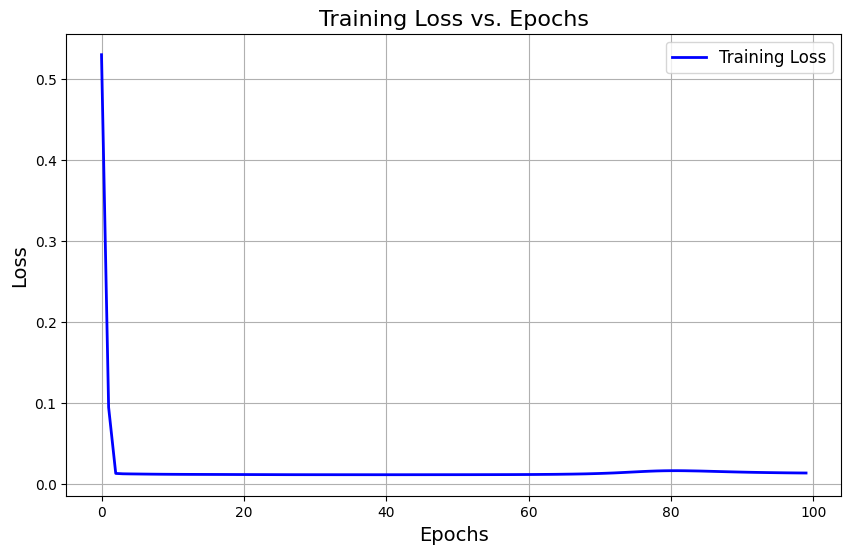

In [16]:
# Plotting the training loss against the number of epochs, and LSTM does not learn much after 10-20 epochs.

# Plot the training loss

plt.figure(figsize=(10, 6))

plt.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)

# Annotating the plot

plt.title('Training Loss vs. Epochs', fontsize=16)

plt.xlabel('Epochs', fontsize=14)

plt.ylabel('Loss', fontsize=14)

plt.legend(fontsize=12)

plt.grid(True)

plt.show()

### Performance Evaluation on Test Set

In [17]:
y_pred = lstm.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step 


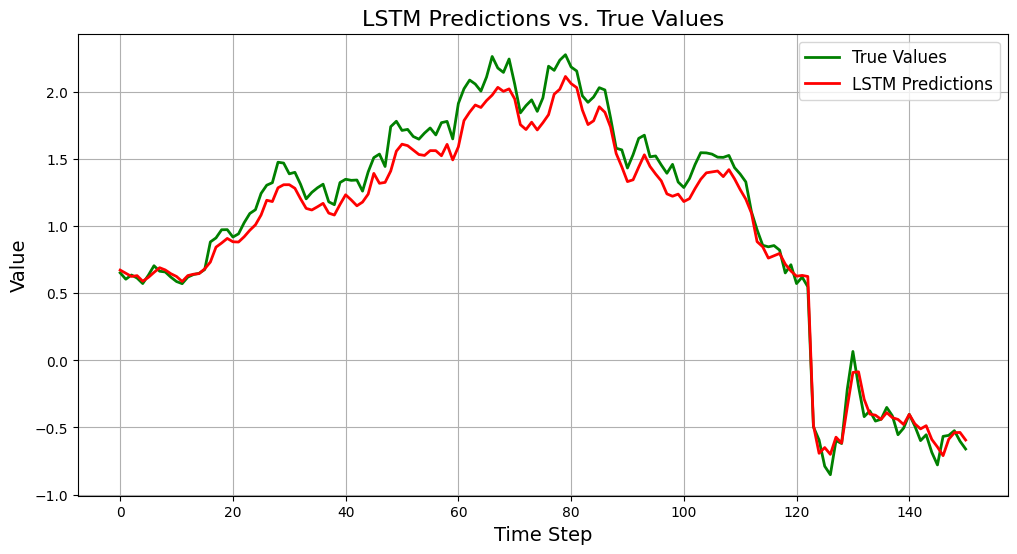

In [18]:
#If n = 1

import matplotlib.pyplot as plt

# Ensure y_test is squeezed (flattened) if it has an extra dimension

y_test_flat = y_test.squeeze()

y_pred_flat = y_pred.squeeze()

# Plot the true values and predictions

plt.figure(figsize=(12, 6))

plt.plot(y_test_flat, label="True Values", color="green", linewidth=2)

plt.plot(y_pred_flat, label="LSTM Predictions", color="red", linewidth=2)

# Add labels, title, and legend

plt.title("LSTM Predictions vs. True Values", fontsize=16)

plt.xlabel("Time Step", fontsize=14)

plt.ylabel("Value", fontsize=14)

plt.legend(fontsize=12)

plt.grid(True)

# Show the plot

plt.show()

In [19]:
mse = mean_squared_error(y_test, y_pred_flat)

rmse = np.sqrt(mse)

mape = mean_absolute_percentage_error(y_test, y_pred_flat)

print("RMSE: ",rmse)

print("MAPE: ", mape)

RMSE:  0.1320479928395415
MAPE:  0.10728051473061254


In [20]:
# Increasing the number of LSTM units per layer to 50.  

lstm = Sequential()

lstm.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]),

              activation='relu', return_sequences=True))

lstm.add(LSTM(50, activation='relu', return_sequences=True))

lstm.add(LSTM(50, activation='relu'))

lstm.add(Dense(1))

lstm.compile(loss='mean_squared_error', optimizer='adam')

lstm.summary()

/Users/cdmstudent/tensorflow-env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 1, 50)          │        10,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 1, 50)          │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,251 (200.20 KB)

 Trainable params: 51,251 (200.20 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history=lstm.fit(X_train, y_train,

                 epochs=100, batch_size=4,

                 verbose=2, shuffle=False)

y_pred = lstm.predict(X_test)

Epoch 1/100
152/152 - 5s - 31ms/step - loss: 0.7014
Epoch 2/100
152/152 - 1s - 3ms/step - loss: 0.0700
Epoch 3/100
152/152 - 0s - 3ms/step - loss: 0.0197
Epoch 4/100
152/152 - 0s - 3ms/step - loss: 0.0141
Epoch 5/100
152/152 - 1s - 4ms/step - loss: 0.0115
Epoch 6/100
152/152 - 1s - 4ms/step - loss: 0.0097
Epoch 7/100
152/152 - 1s - 4ms/step - loss: 0.0086
Epoch 8/100
152/152 - 1s - 3ms/step - loss: 0.0078
Epoch 9/100
152/152 - 0s - 3ms/step - loss: 0.0072
Epoch 10/100
152/152 - 0s - 3ms/step - loss: 0.0066
Epoch 11/100
152/152 - 0s - 3ms/step - loss: 0.0062
Epoch 12/100
152/152 - 1s - 3ms/step - loss: 0.0058
Epoch 13/100
152/152 - 0s - 3ms/step - loss: 0.0055
Epoch 14/100
152/152 - 0s - 3ms/step - loss: 0.0052
Epoch 15/100
152/152 - 0s - 3ms/step - loss: 0.0051
Epoch 16/100
152/152 - 0s - 3ms/step - loss: 0.0048
Epoch 17/100
152/152 - 0s - 3ms/step - loss: 0.0047
Epoch 18/100
152/152 - 0s - 3ms/step - loss: 0.0045
Epoch 19/100
152/152 - 0s - 3ms/step - loss: 0.0044
Epoch 20/100
152/152

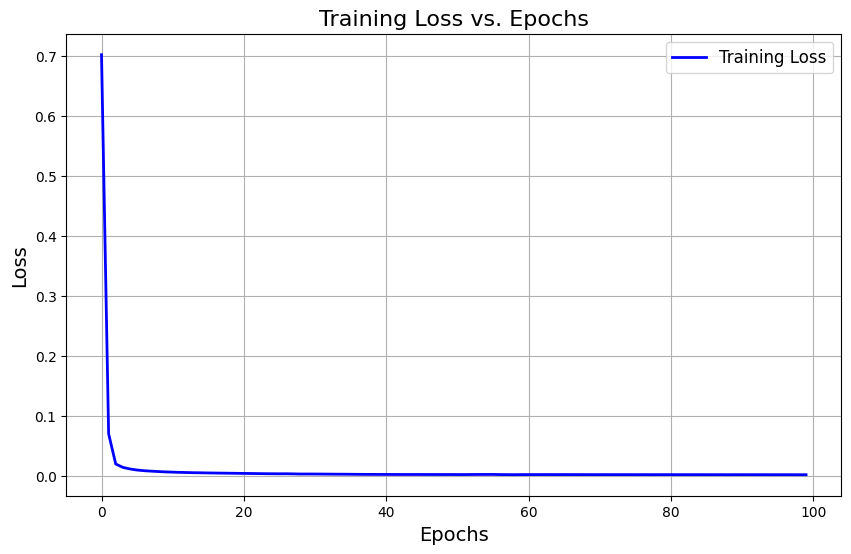

In [22]:
# Plot the training loss

plt.figure(figsize=(10, 6))

plt.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)

# Annotating the plot

plt.title('Training Loss vs. Epochs', fontsize=16)

plt.xlabel('Epochs', fontsize=14)

plt.ylabel('Loss', fontsize=14)

plt.legend(fontsize=12)

plt.grid(True)

plt.show()


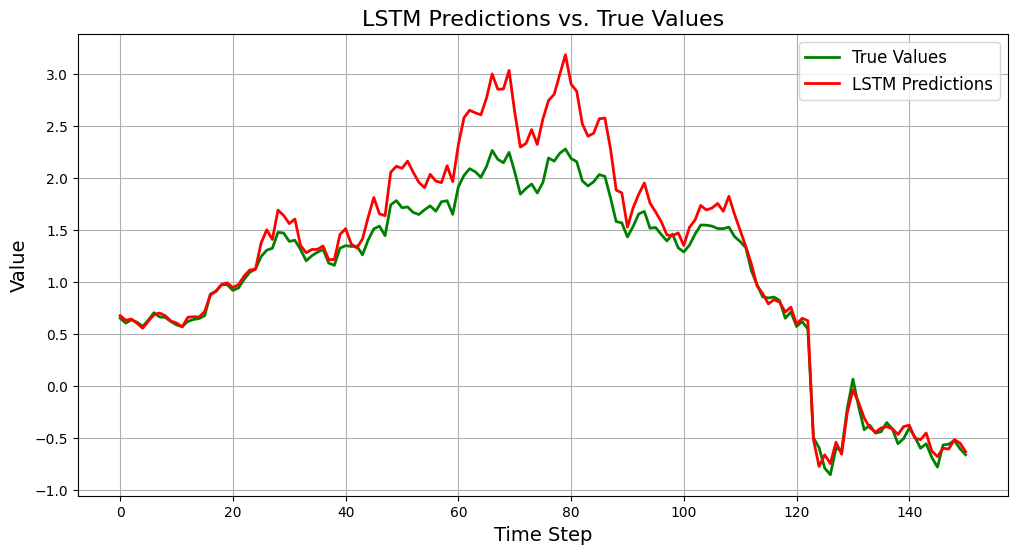

In [23]:
import matplotlib.pyplot as plt

# Ensure y_test is squeezed (flattened) if it has an extra dimension

y_test_flat = y_test.squeeze()

# Plot the true values and predictions

plt.figure(figsize=(12, 6))

plt.plot(y_test_flat, label="True Values", color="green", linewidth=2)

plt.plot(y_pred, label="LSTM Predictions", color="red", linewidth=2)

# Add labels, title, and legend

plt.title("LSTM Predictions vs. True Values", fontsize=16)

plt.xlabel("Time Step", fontsize=14)

plt.ylabel("Value", fontsize=14)

plt.legend(fontsize=12)

plt.grid(True)

# Show the plot

plt.show()

In [24]:
mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

mape = mean_absolute_percentage_error(y_test, y_pred)

print("RMSE: ",rmse)

print("MAPE: ", mape)

RMSE:  0.29332209811624765
MAPE:  0.13759888826609964


In [25]:
n_steps=10

X1, y1 = lstm_split(stock_data_ft.values, n_steps=n_steps)

train_split=0.8

split_idx = int(np.ceil(len(X1)*train_split))

date_index = stock_data_ft.index

X_train, X_test = X1[:split_idx], X1[split_idx:]

y_train, y_test = y1[:split_idx], y1[split_idx:]

X_train_date, X_test_date = date_index[:split_idx], date_index[split_idx:-n_steps]

print(X1.shape, X_train.shape, X_test.shape, X_test_date.shape, y_test.shape)



(748, 10, 3) (599, 10, 3) (149, 10, 3) (149,) (149,)


In [26]:
history=lstm.fit(X_train, y_train,

                 epochs=100, batch_size=4,

                 verbose=2, shuffle=False)

Epoch 1/100
150/150 - 4s - 24ms/step - loss: 8.5858
Epoch 2/100
150/150 - 1s - 9ms/step - loss: 0.0351
Epoch 3/100
150/150 - 1s - 8ms/step - loss: 0.0238
Epoch 4/100
150/150 - 2s - 11ms/step - loss: 0.0186
Epoch 5/100
150/150 - 1s - 10ms/step - loss: 0.0165
Epoch 6/100
150/150 - 1s - 8ms/step - loss: 0.0152
Epoch 7/100
150/150 - 1s - 8ms/step - loss: 0.0145
Epoch 8/100
150/150 - 1s - 9ms/step - loss: 0.0139
Epoch 9/100
150/150 - 1s - 8ms/step - loss: 0.0135
Epoch 10/100
150/150 - 1s - 9ms/step - loss: 0.0131
Epoch 11/100
150/150 - 1s - 8ms/step - loss: 0.0128
Epoch 12/100
150/150 - 1s - 8ms/step - loss: 0.0131
Epoch 13/100
150/150 - 1s - 9ms/step - loss: 0.0130
Epoch 14/100
150/150 - 1s - 8ms/step - loss: 0.0132
Epoch 15/100
150/150 - 1s - 9ms/step - loss: 0.0132
Epoch 16/100
150/150 - 1s - 10ms/step - loss: 0.0135
Epoch 17/100
150/150 - 1s - 9ms/step - loss: 0.0137
Epoch 18/100
150/150 - 1s - 8ms/step - loss: 0.0138
Epoch 19/100
150/150 - 1s - 8ms/step - loss: 0.0141
Epoch 20/100
150/

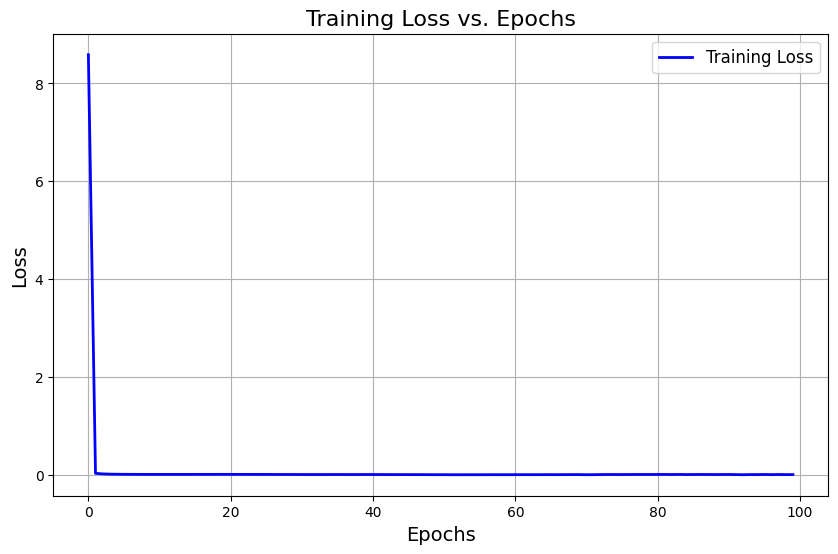

In [27]:
# Plot the training loss

plt.figure(figsize=(10, 6))

plt.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)

# Annotating the plot

plt.title('Training Loss vs. Epochs', fontsize=16)

plt.xlabel('Epochs', fontsize=14)

plt.ylabel('Loss', fontsize=14)

plt.legend(fontsize=12)

plt.grid(True)

plt.show()

In [28]:
y_pred = lstm.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  


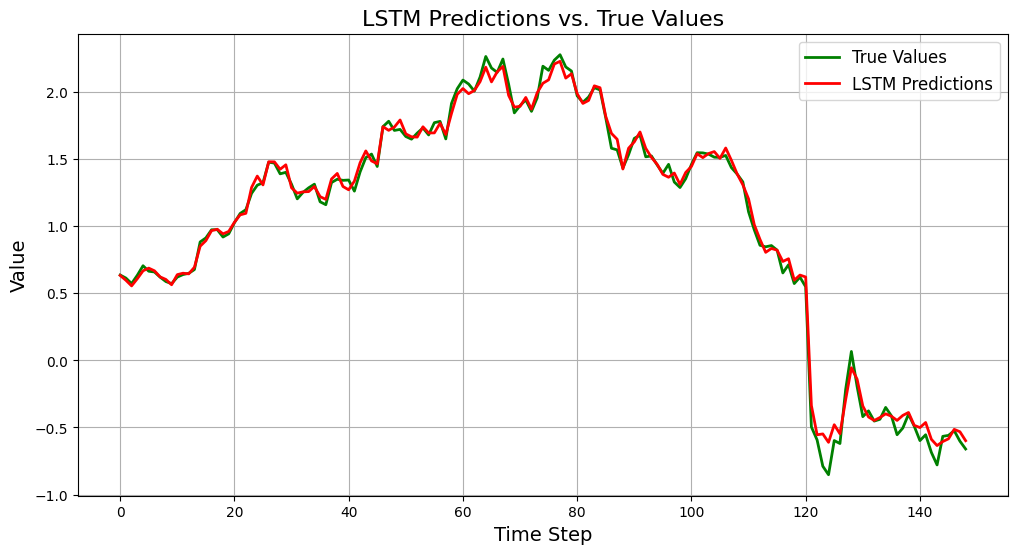

In [29]:
import matplotlib.pyplot as plt

# Ensure y_test is squeezed (flattened) if it has an extra dimension

y_test_flat = y_test.squeeze()

# Plot the true values and predictions

plt.figure(figsize=(12, 6))

plt.plot(y_test_flat, label="True Values", color="green", linewidth=2)

plt.plot(y_pred, label="LSTM Predictions", color="red", linewidth=2)

# Add labels, title, and legend

plt.title("LSTM Predictions vs. True Values", fontsize=16)

plt.xlabel("Time Step", fontsize=14)

plt.ylabel("Value", fontsize=14)

plt.legend(fontsize=12)

plt.grid(True)

# Show the plot

plt.show()

In [30]:
mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

mape = mean_absolute_percentage_error(y_test, y_pred)

print("RMSE: ",rmse)

print("MAPE: ", mape)

RMSE:  0.05858333404776012
MAPE:  0.059210570384011216
